In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import cv2
from PIL import Image

In [2]:
def get_imagens(endereco, files, shape, cor = True, corte = (0,0)):

    num_photos = len(files)

    width,height = shape

    if cor:
        imagens = np.zeros((num_photos,width,height,3))
    else:
        imagens = np.zeros((num_photos,width,height))

    imagens = imagens.astype(np.uint8)

    x1, y1 = corte
    x2 = x1 + width
    y2 = y1 + height

    for i, file in enumerate(files):
        
        imagem = Image.open(f'{endereco}\\{file}')
        imagem_numpy = np.array(imagem)

        imagem_numpy = imagem_numpy[x1:x2,y1:y2]    # Corte da imagem original

        imagens[i] = imagem_numpy                       # Adição da imagem i ao array

    return imagens

In [3]:
def proporcao(tamanho):
    x = tamanho**(1/2)
    x = round(x)
    while(tamanho % x != 0):
        x -= 1
    y = int(tamanho/x)
    return x, y

In [4]:
def show_photos(imagens, cmap ='gray'):

    tamanho = imagens.shape[0]

    dim_x, dim_y = proporcao(tamanho)

    # Configurar a plotagem para mostrar imagens
    fig, axs = plt.subplots(dim_y, dim_x)

    # Iterar sobre as imagens e exibi-las em sequência
    for i in range(dim_y):
        for j in range(dim_x):
            axs[i,j].imshow(imagens[i*dim_x+j], cmap = cmap)
            axs[i,j].axis('off')  # Desativar eixos para uma melhor visualização

    # Exibir a sequência de imagens
    plt.show()


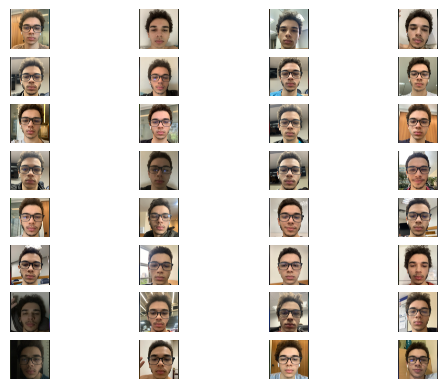

In [5]:
endereco = "photos"
lista_de_fotos = os.listdir(endereco)

imagens_0 = get_imagens(endereco, lista_de_fotos, (775, 775), corte = (340,25))

show_photos(imagens_0)

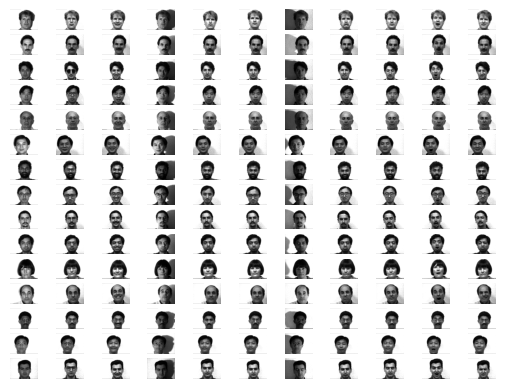

In [13]:
endereco = ".\\archive"
lista_de_fotos = os.listdir(endereco)

imagens = get_imagens(endereco, lista_de_fotos[2:], (243,320), cor = False)

show_photos(imagens)

In [7]:
def create_photo(imagens, lin, col, cor = True):

    
    altura = imagens.shape[1]
    largura = imagens.shape[2]

    nova_altura = lin * altura
    nova_largura = col * largura

    if cor:
        imagem = np.zeros((nova_altura, nova_largura, 3))
        imagem = imagem.astype(np.uint8)
    else:
        imagem = np.zeros((nova_altura, nova_largura))


    for i in range(lin):
        for j in range(col):
            
            index = i*col+j

            foto_selecionada = imagens[index]
        
            if cor:
                imagem[i * altura : (i + 1) * altura, j * largura : (j + 1) * largura, :] = foto_selecionada 
            else:
                imagem[i * altura : (i + 1) * altura, j * largura : (j + 1) * largura] = foto_selecionada 
            
    return imagem

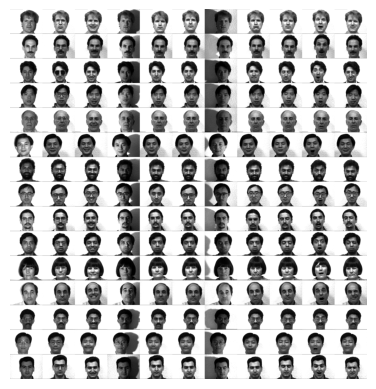

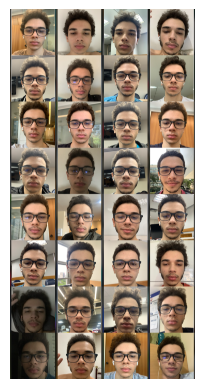

In [8]:
foto = create_photo(imagens, 15, 11, cor = False)
plt.axis('off')
plt.imshow(foto, cmap="gray")
plt.show()

foto = create_photo(imagens_0, 8, 4)
img = plt.imshow(foto)
plt.axis('off')
plt.show()

In [9]:

# plt.rcParams['figure.figsize'] = [10, 10]
# plt.rcParams.update({'font.size': 18})

# mat_contents = scipy.io.loadmat(os.path.join('.','allFaces.mat'))
# faces = mat_contents['faces']
# m = int(mat_contents['m'])
# n = int(mat_contents['n'])
# nfaces = пр.ndarray.flatten(mat_contents['nfaces'])

# allPersons = np.zeros ((n*6, m*6))
# count = 0

# for j in range(6):
#     for k in range(6):
#         allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:, 1+np.sum(nfaces[1:count-1])],n,m)
#         count += 1

# img = plt.imshow(256-allPersons )
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()